Multi-layer Perceptron Regressor (MLPRegressor) - Exercício - Temperatura Mínima Diária da Cidade de Melbourn Austrália - TDNN (rede neural com retardo de tempo)

In [1]:
from sklearn.model_selection import train_test_split # Biblioteca para separação de amostras para treino e teste, curva de aprendizagem do treinamento e para processar a validação cruzada
from sklearn.neural_network import MLPRegressor # Biblioteca para utilização do Regressor MLP
from sklearn.preprocessing import MinMaxScaler, StandardScaler # Biblioteca utilizada para normalização dos dados
from sklearn.pipeline import Pipeline # Biblioteca para organização de ações em sequência
from sklearn import metrics # Biblioteca para avaliação das métricas no modelo
import matplotlib.pyplot as plt # Para visualizacao dos dados por meio de gráfico
import numpy as np # Biblioteca de manipulação de arrays Numpy
import pandas as pd # Biblioteca para manipulação de dados, aqui especificamente para importação e manipulação inicial do dataset
from google.colab import drive # Biblioteca para interação do colab com o drive
drive.mount('/content/drive') # Montando o Google Drive na mesma conta do Google Colab

Mounted at /content/drive


Carregamento e Organização Inicial do Dataset

In [84]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/variacaoValores.csv") # Carregamento do dataset via Pandas
print(df.head(50))

dfNew = pd.DataFrame(columns = ['x-15', 'x-14', 'x-13', 'x-12', 'x-11','x-10', 'x-9', 'x-8', 'x-7', 'x-6', 'x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x'])

dados = df.iloc[:, 1].values # Dados recebe a segunda coluna
tam = len(dados) # Recebe a quantidade de amostras

for i in range(tam-15): # A subtração de 10 é para não incluir dados vazios nas amostras que serão geradas
  # É criado um novo dataframe que receberá os dados atrasados e o target em x para construção das amostras que serão apresentado no treinamento
  df_new_row = pd.DataFrame({'x-15': [dados[i]], 'x-14': [dados[i+1]], 'x-13': [dados[i+2]], 'x-12': [dados[i+3]], 'x-11': [dados[i+4]], 'x-10': [dados[i+5]], 'x-9': [dados[i+6]], 'x-8': [dados[i+7]], 'x-7': [dados[i+8]], 'x-6': [dados[i+9]],'x-5': [dados[i+10]], 'x-4': [dados[i+11]], 'x-3': [dados[i+12]], 'x-2': [dados[i+13]], 'x-1': [dados[i+14]],'x': [dados[i+15]]})
  # A nova amostra é inserida no dataframe final dfNew
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)

y = dfNew[['x']] # Inclusão da variável x no vetor de saídas desejadas
x = dfNew.drop('x', axis=1) # Exclusão da variável x das entradas

    Amostra    f(t)
0         1  0.1701
1         2  0.1023
2         3  0.4405
3         4  0.3609
4         5  0.7192
5         6  0.2258
6         7  0.3175
7         8  0.0127
8         9  0.4290
9        10  0.0544
10       11  0.8000
11       12  0.0450
12       13  0.4268
13       14  0.0112
14       15  0.3218
15       16  0.2185
16       17  0.7240
17       18  0.3516
18       19  0.4420
19       20  0.0984
20       21  0.1747
21       22  0.3964
22       23  0.5114
23       24  0.6183
24       25  0.3330
25       26  0.2398
26       27  0.0508
27       28  0.4497
28       29  0.2178
29       30  0.7762
30       31  0.1078
31       32  0.3773
32       33  0.0001
33       34  0.3877
34       35  0.0821
35       36  0.7836
36       37  0.1887
37       38  0.4483
38       39  0.0424
39       40  0.2539
40       41  0.3164
41       42  0.6386
42       43  0.4862
43       44  0.4068
44       45  0.1611
45       46  0.1101
46       47  0.4372
47       48  0.3795
48       49  0.7092


/tmp/ipython-input-84-2616081916.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)


Pré-Processamento dos Dados

In [98]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.30, random_state=None) # Separação do dataset em amostras para treino e teste, considerando 30% dos valores para teste
testY = testY.ravel()
print(testY)

[0.54603453 0.12296723 0.07880911 0.08068551 0.27232925 0.5627971
 0.47610708 0.30010008 0.50875657 0.31748812 0.29984989 0.47460595
 0.49574681 0.39567175 0.6801351  0.41305979 0.21178384 0.01050788
 0.11358519 0.55854391 0.10257693 0.21841381 0.23580185 0.31736302
 0.         0.47185389 0.24130598 0.2732049  0.1477358  0.48623968
 0.52189142 0.19039279]


Aplicação do MLPRegressor

# Exercício 1 / 2

In [99]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(15),activation='relu', solver='adam', max_iter=5000, tol=0.000001, early_stopping=True, epsilon=1e-06, learning_rate_init = 0.001)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg.fit(trainX, trainY)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=15,
             max_iter=5000, tol=1e-06)

Avaliação do Modelo

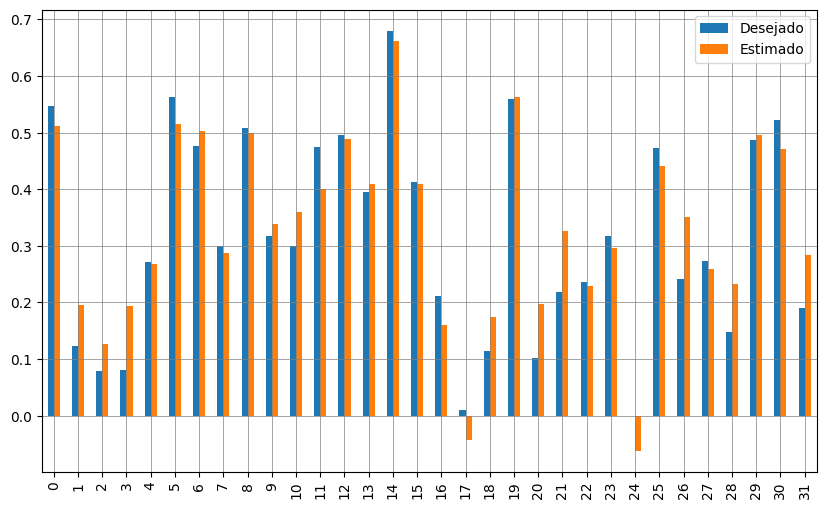

In [100]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_reg.predict(testX)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(60) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

Avaliação do Erro no Processo de Treinamento

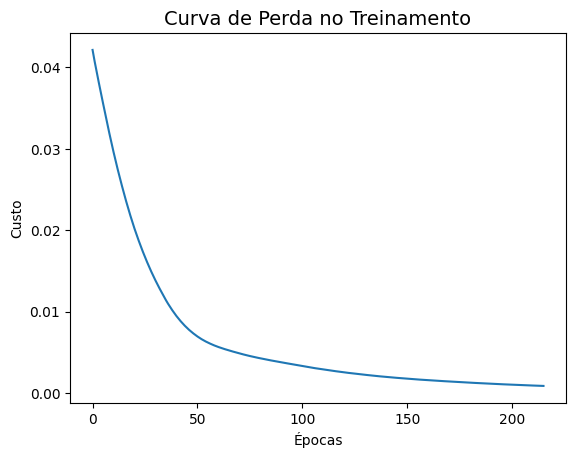

In [101]:
plt.plot(mlp_reg.loss_curve_) # Plotando o gráfico de erros no processo de treinamento - o loss_curve_ só funciona com o adam
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

Resumo das Métricas
Links de Referência:
- https://michael-fuchs-python.netlify.app/2019/06/30/metrics-for-regression-analysis/
- https://medium.com/turing-talks/como-avaliar-seu-modelo-de-regress%C3%A3o-c2c8d73dab96

In [102]:
import numpy as np
from sklearn import metrics

print('Epochs: ', mlp_reg.n_iter_)
print('Loss: ', mlp_reg.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(testY, y_pred))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(testY, y_pred))

# Calcula RMSE manualmente (compatível com qualquer versão)
rmse = np.sqrt(metrics.mean_squared_error(testY, y_pred))
print('Root Mean Squared Error (RMSE): ', rmse)

print('R2 Score: ', metrics.r2_score(testY, y_pred))

Epochs:  216
Loss:  0.0008923418311658946
Mean Absolute Error (MAE):  0.04437873828681302
Mean Squared Error (MSE):  0.0031517300026023412
Root Mean Squared Error (RMSE):  0.05614027077421645
R2 Score:  0.9036042658445961


Sintonizador dos melhores Hiperparâmetros

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'max_iter': 2000, 'solver': 'adam'}


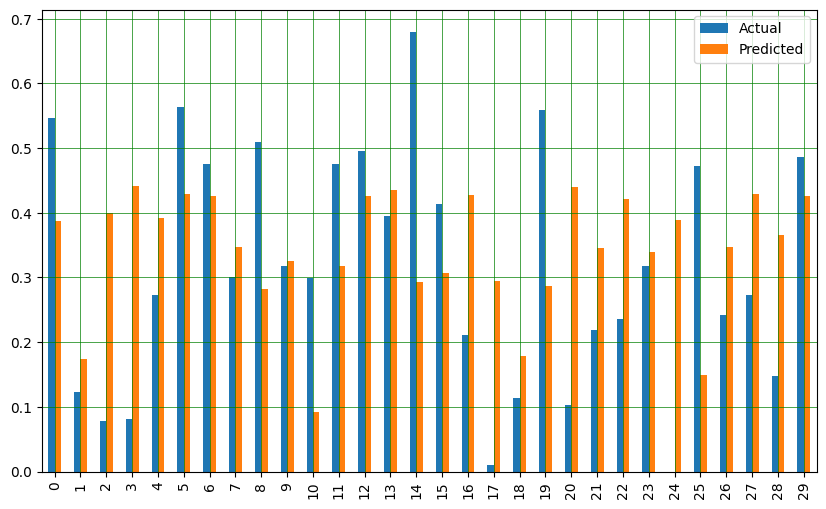

In [103]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(5), (10), (15)],
    'max_iter': [2000, 5000],
    'activation': ['tanh', 'relu'],
    'solver': [ 'adam', 'sgd'],
    'alpha': [0.01, 0.001],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(mlp_reg, param_grid, cv=5)
grid.fit(x, y.ravel())

print(grid.best_params_)

grid_predictions = grid.predict(testX)
df_temp2 = pd.DataFrame({'Actual': testY, 'Predicted': grid_predictions})
df_temp2.head()

df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()